<i>Updated 21/Nov/2021</i> by Yoshihisa Nitta &nbsp; <img src="https://nw.tsuda.ac.jp/icons/nitta-email.gif" />


# Variational Auto Encoder Training for CelebA dataset with Tensorflow 2 on Google Colab

Train Variational Auto Encoder on CelebA dataset.
See VAE_MNIST_Train.ipynb for a description of Variational Auto Encodr.

## CelebA データセットに対して Variational Auto Encoder をGoogle Colab 上の Tensorflow 2 で学習する

CelebA データセットに対して変分オートエンコーダを学習させる。
Variational Auto Encoder の説明は VAE_MNIST_Train.ipynb を参照すること。



In [1]:
#! pip install tensorflow==2.7.0

In [2]:
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)

2.7.0


# Check the Google Colab runtime environment

## Google Colab 実行環境を調べる

In [3]:
! nvidia-smi
! cat /proc/cpuinfo
! cat /etc/issue
! free -h

Sun Nov 21 13:55:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mount Google Drive from Google Colab

## Google Colab から GoogleDrive をマウントする

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
! ls /content/drive

MyDrive  Shareddrives


# Download source file from Google Drive or nw.tsuda.ac.jp
Basically, <code>gdown</code> from Google Drive.
Download from nw.tsuda.ac.jp above only if the specifications of Google Drive change and you cannot download from Google Drive.

# Google Drive または nw.tsuda.ac.jp からファイルをダウンロードする
基本的に Google Drive から <code>gdown</code> してください。
Google Drive の仕様が変わってダウンロードができない場合にのみ、nw.tsuda.ac.jp からダウンロードしてください。

In [7]:
# Download source file
nw_path = './nw'
! rm -rf {nw_path}
! mkdir -p {nw_path}

if True:   # from Google Drive
    url_model =  'https://drive.google.com/uc?id=1ZCihR7JkMOity4wCr66ZCp-3ZOlfwwo3'
    ! (cd {nw_path}; gdown {url_model})
else:      # from nw.tsuda.ac.jp
    URL_NW = 'https://nw.tsuda.ac.jp/lec/GoogleColab/pub'
    url_model = f'{URL_NW}/models/VariationalAutoEncoder.py'
    ! wget -nd {url_model} -P {nw_path}

Downloading...
From: https://drive.google.com/uc?id=1ZCihR7JkMOity4wCr66ZCp-3ZOlfwwo3
To: /content/nw/VariationalAutoEncoder.py
100% 18.7k/18.7k [00:00<00:00, 29.1MB/s]


In [8]:
! cat {nw_path}/VariationalAutoEncoder.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle
import datetime

class Sampling(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        mu, log_var = inputs
        epsilon = tf.keras.backend.random_normal(shape=tf.keras.backend.shape(mu), mean=0., stddev=1.)
        return mu + tf.keras.backend.exp(log_var / 2) * epsilon


class VAEModel(tf.keras.models.Model):
    def __init__(self, encoder, decoder, r_loss_factor, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.r_loss_factor = r_loss_factor


    @tf.function
    def loss_fn(self, x):
        z_mean, z_log_var, z = self.encoder(x)
        reconstruction = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(
            tf.square(x - reconstruction), axis=[1,2,3]
        ) * self.r_loss_factor
        kl_loss = tf.reduce_sum(
   

# Preparing CelebA dataset

Official WWW of CelebA dataset:
<a href="https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">
https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
</a>

Google Drive of CelebA dataset:
<a href="https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg">
https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
</a>

img_align_celeba.zip mirrored on my Google Drive:    
<a href="https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx">
https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx
</a>

## CelebA データセットを用意する

CelebA データセットの公式ページ:
<a href="https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">
https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
</a>

CelebA データセットのGoogle Drive:
<a href="https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg">
https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
</a>

自分の Google Drive 上にミラーした img_align_celeba.zip:    
<a href="https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx">
https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx
</a>

In [9]:
# Download img_align_celeba.zip from GoogleDrive

MIRRORED_URL = 'https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx'

! gdown {MIRRORED_URL}

Downloading...
From: https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx
To: /content/img_align_celeba.zip
100% 1.44G/1.44G [00:06<00:00, 222MB/s]


In [72]:
! ls -l img_align_celeba.zip

-rw-r--r-- 1 root root 1443490838 Nov 21 13:56 img_align_celeba.zip


In [11]:
DATA_DIR = 'data'
DATA_SUBDIR = 'img_align_celeba'

In [12]:
! rm -rf {DATA_DIR}
! unzip -d {DATA_DIR} -q {DATA_SUBDIR}.zip

In [13]:
! ls -l {DATA_DIR}/{DATA_SUBDIR} | head
! ls {DATA_DIR}/{DATA_SUBDIR} | wc

total 1737936
-rw-r--r-- 1 root root 11440 Sep 28  2015 000001.jpg
-rw-r--r-- 1 root root  7448 Sep 28  2015 000002.jpg
-rw-r--r-- 1 root root  4253 Sep 28  2015 000003.jpg
-rw-r--r-- 1 root root 10747 Sep 28  2015 000004.jpg
-rw-r--r-- 1 root root  6351 Sep 28  2015 000005.jpg
-rw-r--r-- 1 root root  8073 Sep 28  2015 000006.jpg
-rw-r--r-- 1 root root  8203 Sep 28  2015 000007.jpg
-rw-r--r-- 1 root root  7725 Sep 28  2015 000008.jpg
-rw-r--r-- 1 root root  8641 Sep 28  2015 000009.jpg
 202599  202599 2228589


# Check the CelebA dataset

## CelebA データセットを確認する

In [14]:
# paths to all the image files.

import os
import glob
import numpy as np

all_file_paths = np.array(glob.glob(os.path.join(DATA_DIR, DATA_SUBDIR, '*.jpg')))
n_all_images = len(all_file_paths)

print(n_all_images)

202599


In [15]:
# slect some image files.

n_to_show = 10
selected_indices = np.random.choice(range(n_all_images), n_to_show)
selected_paths = all_file_paths[selected_indices]

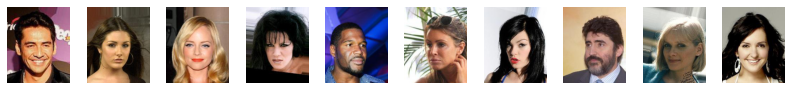

In [16]:
# Display some images.
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, n_to_show, figsize=(1.4 * n_to_show, 1.4))
for i, path in enumerate(selected_paths):
    img = tf.keras.preprocessing.image.load_img(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

# Separate image files for train and test

## 画像ファイルを学習用とテスト用に分割する

In [17]:
TRAIN_DATA_DIR = 'train_data'
TEST_DATA_DIR = 'test_data'

In [18]:
import os

split = 0.05

indices = np.arange(n_all_images)
np.random.shuffle(indices)
train_indices = indices[: -int(n_all_images * split)]
test_indices = indices[-int(n_all_images * split):]

! rm -rf {TRAIN_DATA_DIR} {TEST_DATA_DIR}

dst=f'{TRAIN_DATA_DIR}/celeba'
if not os.path.exists(dst):
    os.makedirs(dst)
for idx in train_indices:
    path = all_file_paths[idx]
    dpath, fname = os.path.split(path)
    os.symlink(f'../../{path}', f'{dst}/{fname}')

dst=f'{TEST_DATA_DIR}/celeba'
if not os.path.exists(dst):
    os.makedirs(dst)
for idx in test_indices:
    path = all_file_paths[idx]
    dpath, fname = os.path.split(path)
    os.symlink(f'../../{path}', f'{dst}/{fname}')

# Prepare ImageDataGenerator

<code>flow_from_directory()</code> requires to specify the parent directory of the directory where the image files are located.

## ImageDataGenerator を用意する

<code>flow_from_directory()</code> では image files があるディレクトリの親ディレクトリを指定する必要がある。

In [19]:
INPUT_DIM = (128, 128, 3)
BATCH_SIZE = 32

In [20]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255
    )

data_flow = data_gen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size = INPUT_DIM[:2],
    batch_size = BATCH_SIZE,
    shuffle=True,
    class_mode = 'input'
    )

val_data_flow = data_gen.flow_from_directory(
    TEST_DATA_DIR,
    target_size = INPUT_DIM[:2],
    batch_size = BATCH_SIZE,
    shuffle=True,
    class_mode = 'input'
    )

Found 192470 images belonging to 1 classes.
Found 10129 images belonging to 1 classes.


In [21]:
print(len(data_flow))
print(len(val_data_flow))

6015
317


(128, 128, 3)


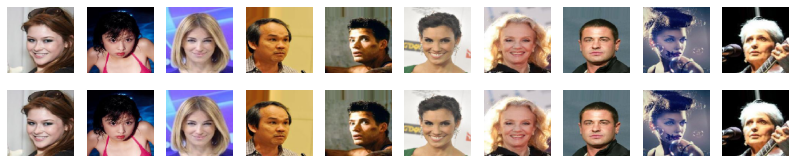

In [22]:
# ImageDataGenerator.next() returns the same x and y when class_mode='input'
x, y = next(data_flow)
print(x[0].shape)

%matplotlib inline
import matplotlib.pyplot as plt

n_to_show = 10
fig, ax = plt.subplots(2, n_to_show, figsize=(1.4 * n_to_show, 1.4 * 2))
for i in range(n_to_show):
    ax[0][i].imshow(x[i])
    ax[0][i].axis('off')
    ax[1][i].imshow(y[i])
    ax[1][i].axis('off')
plt.show()

# Define the Neural Network Model

## ニューラルネットワーク・モデルを定義する

In [23]:
from nw.VariationalAutoEncoder import VariationalAutoEncoder

vae = VariationalAutoEncoder(
    input_dim = INPUT_DIM,
    encoder_conv_filters = [ 32, 64, 64, 64 ],
    encoder_conv_kernel_size = [ 3, 3, 3, 3 ],
    encoder_conv_strides = [ 2, 2, 2, 2 ],
    decoder_conv_t_filters = [ 64, 64, 32, 3 ],
    decoder_conv_t_kernel_size = [ 3, 3, 3, 3 ],
    decoder_conv_t_strides = [ 2, 2, 2, 2 ],
    z_dim = 200,
    use_batch_norm = True,
    use_dropout = True,
    r_loss_factor = 10000
)

In [24]:
vae.encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 encoder_conv_0 (Conv2D)        (None, 64, 64, 32)   896         ['encoder_input[0][0]']          
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 32)  128         ['encoder_conv_0[0][0]']         
 alization)                                                                                       
                                                                                            

In [25]:
vae.decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 200)]             0         
                                                                 
 dense (Dense)               (None, 4096)              823296    
                                                                 
 reshape (Reshape)           (None, 8, 8, 64)          0         
                                                                 
 decoder_conv_t_0 (Conv2DTra  (None, 16, 16, 64)       36928     
 nspose)                                                         
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 16, 64)        0   

# Training

## 学習

In [26]:
LEARNING_RATE = 0.0005

In [27]:
MAX_EPOCHS = 4

# (1) Training: Use <code>vae.model.fit()</code>

Note that the loss function is not specified at the call of <code>vae.model.compile()</code> function.
Since it cannot be calculated simply using <code>y_true</code> and <code>y_pred</code>, the <code>train_step()</code> function of the <code>VAEModel</code> class called from <code>fit()</code> is used to find loss and gradients and train them.
The <code>self.optimizer</code> of the <code>VAEModel</code> class referenced in the <code>train_step()</code> function is the optimizer given by the <code>compile()</code> function.


## (1) 学習する: <code>vae.model.fit()</code> を使う

<code>vae.model.compile()</code> 関数の呼び出しにおいて、loss関数を指定しないことに注意が必要である。
 <code>y_true</code> と <code>y_pred</code> を使って単純に計算できないので、<code>fit()</code> から呼び出される
 <code>VAEModel</code> クラスの
 <code>train_step()</code> 関数でlossとgradientsを求めて、trainingする。
 <code>train_step()</code> 関数の中で参照される <code>VAEModel</code> クラスの <code>self.optimizer</code> は <code>compile()</code> 関数で与えられた optimizer である。

In [28]:
save_path1 = '/content/drive/MyDrive/ColabRun/VAE_CelebA01'

In [29]:
optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE)
vae.model.compile(optimizer=optimizer)

In [30]:
history = vae.train_generator_with_fit(
    data_flow,
    epochs = 3,
    run_folder = save_path1
)

Epoch 1/3
6015/6015 [==============================] - 292s 48ms/step - loss: 243.5313 - reconstruction_loss: 183.9535 - kl_loss: 59.5779
Epoch 2/3
6015/6015 [==============================] - 263s 44ms/step - loss: 209.1433 - reconstruction_loss: 147.8302 - kl_loss: 61.3132
Epoch 3/3
6015/6015 [==============================] - 262s 44ms/step - loss: 204.8720 - reconstruction_loss: 143.5817 - kl_loss: 61.2904


In [31]:
print(history.history)

{'loss': [208.21795654296875, 212.05111694335938, 214.60659790039062], 'reconstruction_loss': [148.90037536621094, 149.67774963378906, 153.86358642578125], 'kl_loss': [59.31757736206055, 62.37335968017578, 60.74300765991211]}


In [32]:
print(history.history.keys())

dict_keys(['loss', 'reconstruction_loss', 'kl_loss'])


In [33]:
loss1_1 = history.history['loss']
rloss1_1 = history.history['reconstruction_loss']
kloss1_1 = history.history['kl_loss']

## Training in addition

Load the saved parameters and model weights, and try training further.

### 追加の学習

保存してあるパラメータとモデルの重みをロードして、追加の学習を試みる。

In [34]:
# Load the saved parameters and weights.
# 保存してある学習結果をロードする。

vae_work = VariationalAutoEncoder.load(save_path1)

# Display the epoch count of the model.
# training のepoch回数を表示する。

print(vae_work.epoch)

3


In [35]:
# Training in addition
# 追加で training する。

vae_work.model.compile(optimizer)


history2 = vae_work.train_generator_with_fit(
    data_flow,
    epochs = MAX_EPOCHS,
    run_folder = save_path1
)

Epoch 4/4
6015/6015 [==============================] - 265s 44ms/step - loss: 203.5751 - reconstruction_loss: 142.3118 - kl_loss: 61.2633


In [36]:
print(len(history2.history))

3


In [37]:
loss1_2 = history2.history['loss']
rloss1_2 = history2.history['reconstruction_loss']
kloss1_2 = history2.history['kl_loss']

loss1 = np.concatenate([loss1_1, loss1_2], axis=0)
rloss1 = np.concatenate([rloss1_1, rloss1_2], axis=0)
kloss1 = np.concatenate([kloss1_1, kloss1_2], axis=0)

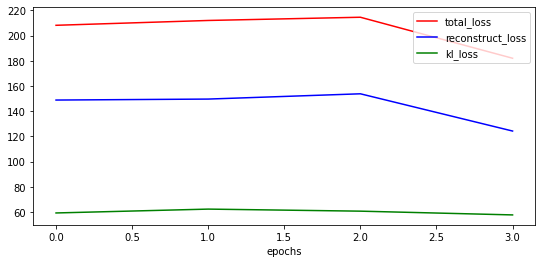

In [38]:
VariationalAutoEncoder.plot_history([loss1, rloss1, kloss1], ['total_loss', 'reconstruct_loss', 'kl_loss'])

## Validate Training results

Since the returned value of <code>vae.decoder()</code> is Tensor for the use of <code>@tf.function</code>, it needs to be converted to an array of numpy.

### 学習結果を検証する
<code>@tf.function</code> 宣言のため <code>vae.decoder()</code> の返り値は Tensor になっているので、numpy の配列に変換する必要がある。

In [39]:
x_, _ = next(val_data_flow)
selected_images = x_[:10]

In [40]:
z_mean, z_log_var, z = vae_work.encoder(selected_images)
reconst_images = vae_work.decoder(z).numpy()  # Convert Tensor to numpy array.

txts = [f'{p[0]:.3f}, {p[1]:.3f}' for p in z ]

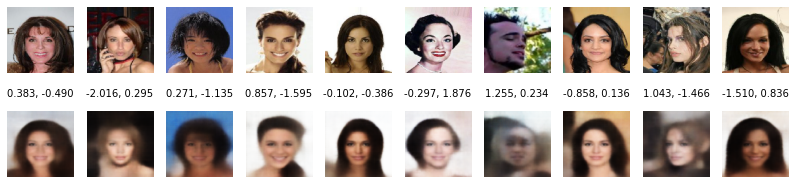

In [41]:
%matplotlib inline

VariationalAutoEncoder.showImages(selected_images, reconst_images, txts, 1.4, 1.4)

# (2) Training with <code>tf.GradientTape()</code> function.
Instead of using <code>fit()</code>, calculate the loss in your own <code>train()</code> function, find the gradients, and apply them to the variables.

The <code>train_tf()</code> function is speeding up by declaring <code>@tf.function</code> the <code>compute_loss_and_grads()</code> function.

## (2) <code>tf.GradientTape()</code> 関数を使った学習

<code>fit()</code> 関数を使わずに、自分で記述した <code>train()</code> 関数内で loss を計算し、gradients を求めて、変数に適用する。

<code>train_tf()</code> 関数では、lossとgradientsの計算を行う <code>compute_loss_and_grads()</code> 関数を <code>@tf.function</code> 宣言することで高速化を図っている。

In [42]:
save_path2 = '/content/drive/MyDrive/ColabRun/VAE_CelebA02/'

In [43]:
from nw.VariationalAutoEncoder import VariationalAutoEncoder

vae2 = VariationalAutoEncoder(
    input_dim = INPUT_DIM,
    encoder_conv_filters = [ 32, 64, 64, 64 ],
    encoder_conv_kernel_size = [ 3, 3, 3, 3 ],
    encoder_conv_strides = [ 2, 2, 2, 2 ],
    decoder_conv_t_filters = [ 64, 64, 32, 3 ],
    decoder_conv_t_kernel_size = [ 3, 3, 3, 3 ],
    decoder_conv_t_strides = [ 2, 2, 2, 2 ],
    z_dim = 200,
    use_batch_norm = True,
    use_dropout = True,
    r_loss_factor = 10000
)

In [44]:
optimizer2 = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE)

In [45]:
log2_1 = vae2.train_tf_generator(
    data_flow,
    epochs = 3,
    run_folder = save_path2,
    optimizer = optimizer2,
    save_epoch_interval = 50
)

1/3 6015 loss: total 244.037 reconstruction 183.636 kl 60.401 0:04:37.396218
2/3 6015 loss: total 209.520 reconstruction 148.031 kl 61.489 0:09:14.412426
3/3 6015 loss: total 205.202 reconstruction 144.017 kl 61.185 0:13:39.886454


In [46]:
print(log2_1.keys())

loss2_1 = log2_1['loss']
rloss2_1 = log2_1['reconstruction_loss']
kloss2_1 = log2_1['kl_loss']

dict_keys(['loss', 'reconstruction_loss', 'kl_loss'])


In [47]:
# Load the saved parameters and weights.
# 保存したパラメータと重みを読み込む

vae2_work = VariationalAutoEncoder.load(save_path2)
print(vae2_work.epoch)

3


In [48]:
# Train in addition
# 追加で training する。

log2_2 = vae2_work.train_tf_generator(
    data_flow,
    epochs = MAX_EPOCHS,
    run_folder = save_path2,
    optimizer = optimizer2,
    save_epoch_interval=50
)

4/4 6015 loss: total 203.840 reconstruction 142.770 kl 61.070 0:04:23.347881


In [49]:
loss2_2 = log2_2['loss']
rloss2_2 = log2_2['reconstruction_loss']
kloss2_2 = log2_2['kl_loss']

In [50]:
loss2 = np.concatenate([loss2_1, loss2_2], axis=0)
rloss2 = np.concatenate([rloss2_1, rloss2_2], axis=0)
kloss2 = np.concatenate([kloss2_1, kloss2_2], axis=0)

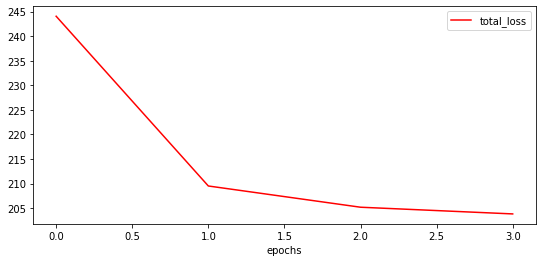

In [51]:
VariationalAutoEncoder.plot_history(
    [loss2], 
    ['total_loss']
)

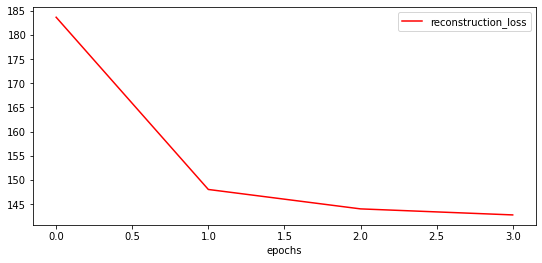

In [52]:
VariationalAutoEncoder.plot_history(
    [rloss2], 
    ['reconstruction_loss']
)

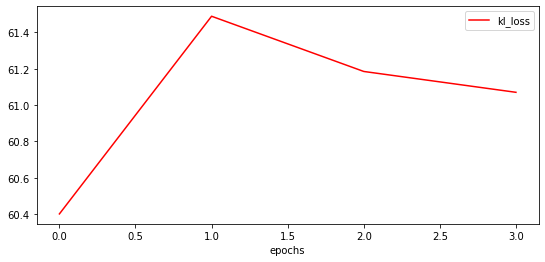

In [53]:
VariationalAutoEncoder.plot_history(
    [kloss2], 
    ['kl_loss']
)

In [54]:
z_mean2, z_log_var2, z2 = vae2_work.encoder(selected_images)
reconst_images2 = vae2_work.decoder(z2).numpy()  # decoder() returns Tensor for @tf.function declaration. Convert the Tensor to numpy array.

txts2 = [f'{p[0]:.3f}, {p[1]:.3f}' for p in z2 ]

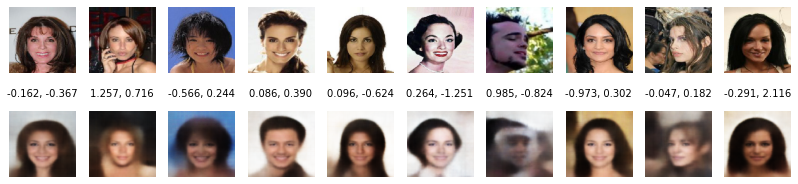

In [55]:
%matplotlib inline

VariationalAutoEncoder.showImages(selected_images, reconst_images2, txts2, 1.4, 1.4)

# (3) Trainig with <code>tf.GradientTape()</code> function and Learning rate decay

Calculate the loss and gradients with the <code>tf.GradientTape()</code> function, and apply the gradients to the variables. 
In addition, perform Learning rate decay in the optimizer.



## (3) <code>tf.GradientTape()</code> 関数と学習率減数を使った学習

<code>tf.GradientTape()</code> 関数を使って loss と gradients を計算して、gradients を変数に適用する。
さらに、optimizer において Learning rate decay を行う。


In [56]:
save_path3 = '/content/drive/MyDrive/ColabRun/VAE_CelebA03/'

In [57]:
from nw.VariationalAutoEncoder import VariationalAutoEncoder

vae3 = VariationalAutoEncoder(
    input_dim = INPUT_DIM,
    encoder_conv_filters = [ 32, 64, 64, 64 ],
    encoder_conv_kernel_size = [ 3, 3, 3, 3 ],
    encoder_conv_strides = [ 2, 2, 2, 2 ],
    decoder_conv_t_filters = [ 64, 64, 32, 3 ],
    decoder_conv_t_kernel_size = [ 3, 3, 3, 3 ],
    decoder_conv_t_strides = [ 2, 2, 2, 2 ],
    z_dim = 200,
    use_batch_norm = True,
    use_dropout = True,
    r_loss_factor = 10000
)

In [58]:
# initial_learning_rate * decay_rate ^ (step // decay_steps)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = LEARNING_RATE,
    decay_steps = len(data_flow),
    decay_rate=0.96
)

optimizer3 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [59]:
log3_1 = vae3.train_tf_generator(
    data_flow,
    epochs = 3,
    run_folder = save_path3,
    optimizer = optimizer3,
    save_epoch_interval=50,
    validation_data_flow = val_data_flow
)

1/3 6015 loss: total 243.864 reconstruction 184.582 kl 59.282 val loss total 212.453 reconstruction 151.405 kl 61.048 0:04:35.441944
2/3 6015 loss: total 209.031 reconstruction 147.916 kl 61.115 val loss total 205.847 reconstruction 144.725 kl 61.122 0:09:07.893982
3/3 6015 loss: total 204.673 reconstruction 143.572 kl 61.101 val loss total 202.786 reconstruction 142.933 kl 59.853 0:13:37.730815


In [60]:
print(log3_1.keys())

loss3_1 = log3_1['loss']
rloss3_1 = log3_1['reconstruction_loss']
kloss3_1 = log3_1['kl_loss']
val_loss3_1 = log3_1['val_loss']
val_rloss3_1 = log3_1['val_reconstruction_loss']
val_kloss3_1 = log3_1['val_kl_loss']

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


In [61]:
# Load the parameters and model weights saved before
# 保存したパラメータと重みを読み込む

vae3_work = VariationalAutoEncoder.load(save_path3)
print(vae3_work.epoch)

3


In [62]:
# Training in addition
# 追加で training する。

log3_2 = vae3_work.train_tf_generator(
    data_flow,
    epochs = MAX_EPOCHS,
    run_folder = save_path3,
    optimizer = optimizer3,
    save_epoch_interval=50,
    validation_data_flow = val_data_flow
)

4/4 6015 loss: total 202.917 reconstruction 141.660 kl 61.258 val loss total 200.257 reconstruction 139.290 kl 60.967 0:04:39.441345


In [63]:
loss3_2 = log3_2['loss']
rloss3_2 = log3_2['reconstruction_loss']
kloss3_2 = log3_2['kl_loss']
val_loss3_2 = log3_2['val_loss']
val_rloss3_2 = log3_2['val_reconstruction_loss']
val_kloss3_2 = log3_2['val_kl_loss']

In [64]:
loss3 = np.concatenate([loss3_1, loss3_2], axis=0)
rloss3 = np.concatenate([rloss3_1, rloss3_2], axis=0)
kloss3 = np.concatenate([kloss3_1, kloss3_2], axis=0)

val_loss3 = np.concatenate([val_loss3_1, val_loss3_2], axis=0)
val_rloss3 = np.concatenate([val_rloss3_1, val_rloss3_2], axis=0)
val_kloss3 = np.concatenate([val_kloss3_1, val_kloss3_2], axis=0)

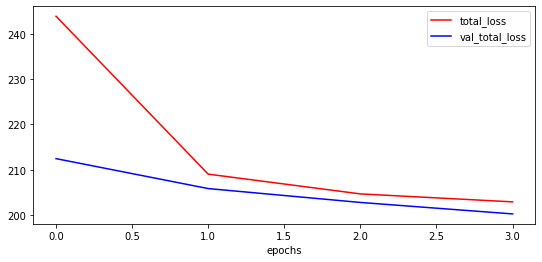

In [65]:
VariationalAutoEncoder.plot_history(
    [loss3, val_loss3], 
    ['total_loss', 'val_total_loss']
)

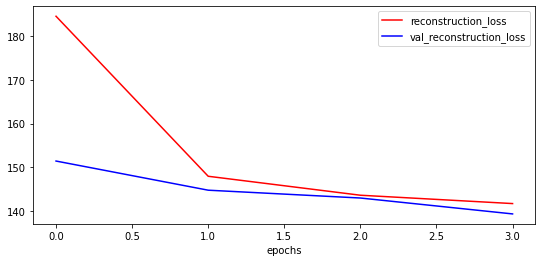

In [66]:
VariationalAutoEncoder.plot_history(
    [rloss3, val_rloss3], 
    ['reconstruction_loss', 'val_reconstruction_loss']
)

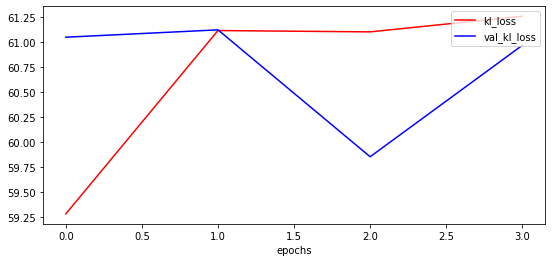

In [67]:
VariationalAutoEncoder.plot_history(
    [kloss3, val_kloss3], 
    ['kl_loss', 'val_kl_loss']
)

In [68]:
z_mean3, z_log_var3, z3 = vae3_work.encoder(selected_images)
reconst_images3 = vae3_work.decoder(z3).numpy()  # decoder() returns Tensor for @tf.function declaration. Convert the Tensor to numpy array.
txts3 = [f'{p[0]:.3f}, {p[1]:.3f}' for p in z3 ]

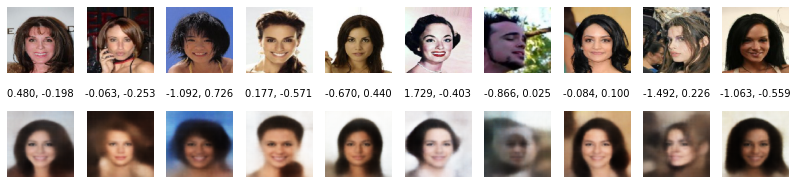

In [69]:
%matplotlib inline

VariationalAutoEncoder.showImages(selected_images, reconst_images3, txts3, 1.4, 1.4)

# Save the loss transition for future training.

Save the loss transition in (3) Training to the file 'loss_<i>N</i>.pkl'.

# 将来の学習のために、loss の変遷をセーブしておく

「(3) 学習」のlossの変遷を 'loss_<i>N</i>.pkl' ファイルにセーブしておく。

In [73]:
# Save loss variables for future training
# 将来の学習のために loss 変数をセーブしておく
import os
import pickle

var_path = f'{save_path3}/loss_{vae3_work.epoch-1}.pkl'

dpath, fname = os.path.split(var_path)
if dpath != '' and not os.path.exists(dpath):
    os.makedirs(dpath)

with open(var_path, 'wb') as f:
    pickle.dump([
        loss3, 
        rloss3, 
        kloss3, 
        val_loss3, 
        val_rloss3, 
        val_kloss3         
    ], f)

In [76]:
! ls -l {save_path3}

total 6
-rw------- 1 root root  434 Nov 21 14:54 loss_3.pkl
-rw------- 1 root root  434 Nov 21 14:51 losses.pkl
-rw------- 1 root root  104 Nov 21 14:51 params.pkl
drwx------ 2 root root 4096 Nov 21 14:51 weights
